---
# Financial Econometrics I
#### Introduction to R Markdown and Jupyter: Time series simulation and real-world data manipulation

by Jozef Barunik and Josef Kurka

#### Seminar I: Summer Semester 2022/2023
___

#### Jupyter

Jupyter Notebooks allow users to create interactive documents containing live codes, figures, equations, and much more. Jupyter supports over 40 programming languages including Python, Julia, R. Summary of all supported programming languages can be found on [GitHub](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels). Throughout this course we will be working with R and R Markdown via Jupyter Notebooks. 

You can try Jupyter online without installing: https://jupyter.org/try

To run it after the installation (instruction in mail) see: https://jupyter.readthedocs.io/en/latest/running.html

---
## Starting with Jupyter

### Useful short-cuts

The most important keyboard shortcuts are ```Enter```, which enters edit mode, and ```Esc```, which enters command mode.

```Esc``` will take you into command mode where you can navigate around your notebook with arrow keys. When in command mode, press:

*    `A` to insert a new cell above the current cell, B to insert a new cell below.
*    `M` to change the current cell to Markdown, Y to change it back to code
*    `D + D` (press the key twice) to delete the current cell
* `Shift + J` or `Shift + Down` to select cell below. Press multiple times to extend the selection.
* `Shift + K` or `Shift + Up` to select cell below. Again, press multiple times to extend the selection.
* `Shift + M` to merge selected cells. If only one cell is selected, it will be merged with the cell below.

In edit mode use:

* `Ctrl + Shift + -` to split the current cell into two from where your cursor is.
* `Shift + Tab` will show you the Docstring (documentation) for the the object you have just typed in a code cell
* `Shift + Enter` to evaluate a cell and advance to the next one
* `Ctrl + Enter` to evaluate a cell without advancing
* `Alt + Enter` (`Option + Enter` on Mac) to evaluate a cell and insert empty one below
___


library(repr)
options(repr.plot.width = 10, repr.plot.height = 8)

3 + 2

In [4]:
3 - 2

3 * 2

[1] 1

[1] 6

In [ ]:
3 ^ 2

3 ** 2

### Text editing
If you switch cell from code to Markdown mode (use `M` to do so) you can use Jupyter as a text editor. 

Create mathematical formulas by using the symbol \$. <br>

If you want to insert simple formulas into text, e.g. $y=x^2$, use a single \$. 

When creating more elaborate formulas, that require separate line, then use \$\$.  

$$ y = \sum_{i=1}^{n} \frac{x_{i}^2}{(x_{i}-\overline{x})^2} $$ 

\* text \* produces *text in italics*, \*\* text \*\* produces **bold text**.

Headers are created using the symbol \#, where amount of \# indicates rank of the header.

Use `Y` to switch the cell from Markdown to Code mode.


___
### Time series plotting

Begin with creating a vector of data.

In [1]:
x <- seq(1, 20)
print(x)

 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20


Create a vector of data with step.

In [2]:
y <- seq(1, 20, by = 2)
print(y)

 [1]  1  3  5  7  9 11 13 15 17 19


Now plot $x^2$.

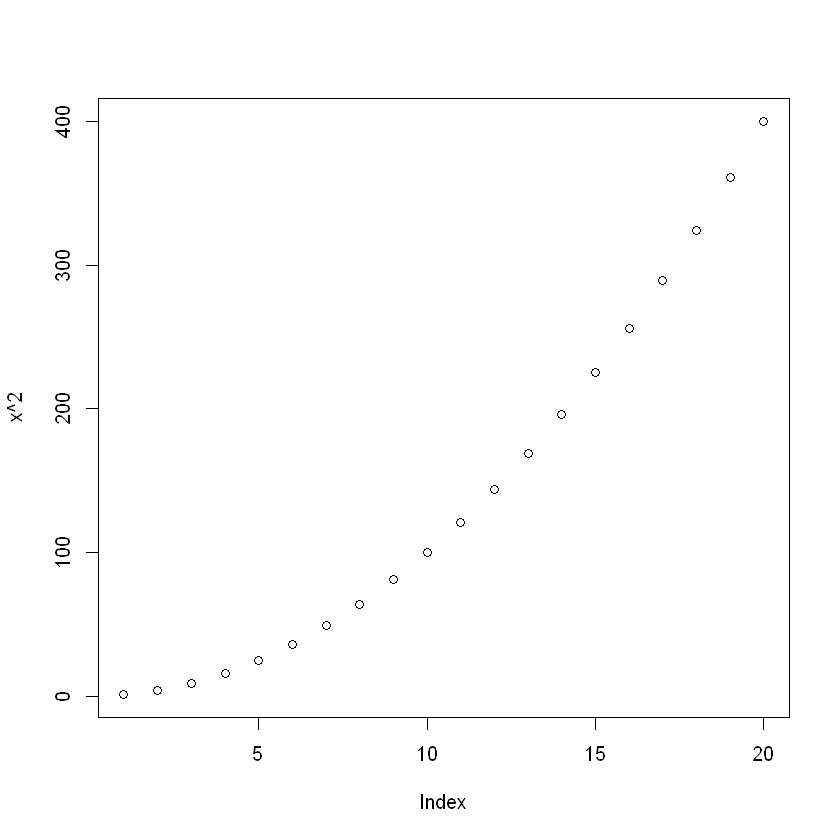

In [3]:
plot(x ^ 2)

The plot function uses point plot by default. In many cases, we would rather like to plot lines or other types of plot instead of points. <br>
Look into help for *plot* function to find out how to produce a line plot. You can get help by typing "?" "function name" into the R-code field.

Plot a sine wave.

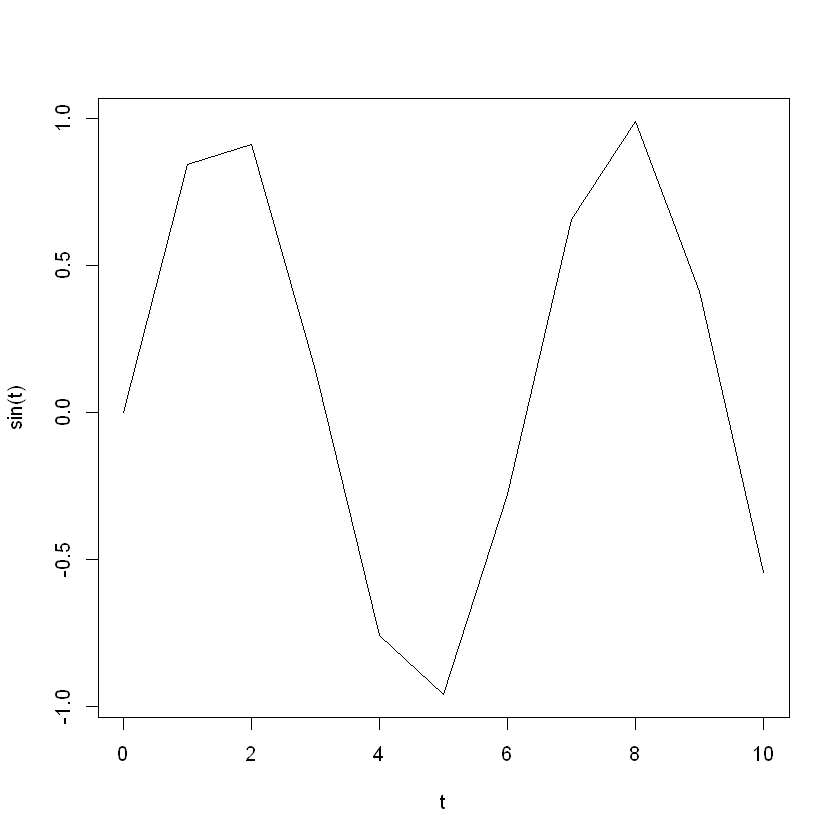

In [4]:
t <- seq(0, 10, by = 1)
plot(t, sin(t), type = 'l')

 [1] -10  -8  -6  -4  -2   0   2   4   6   8  10


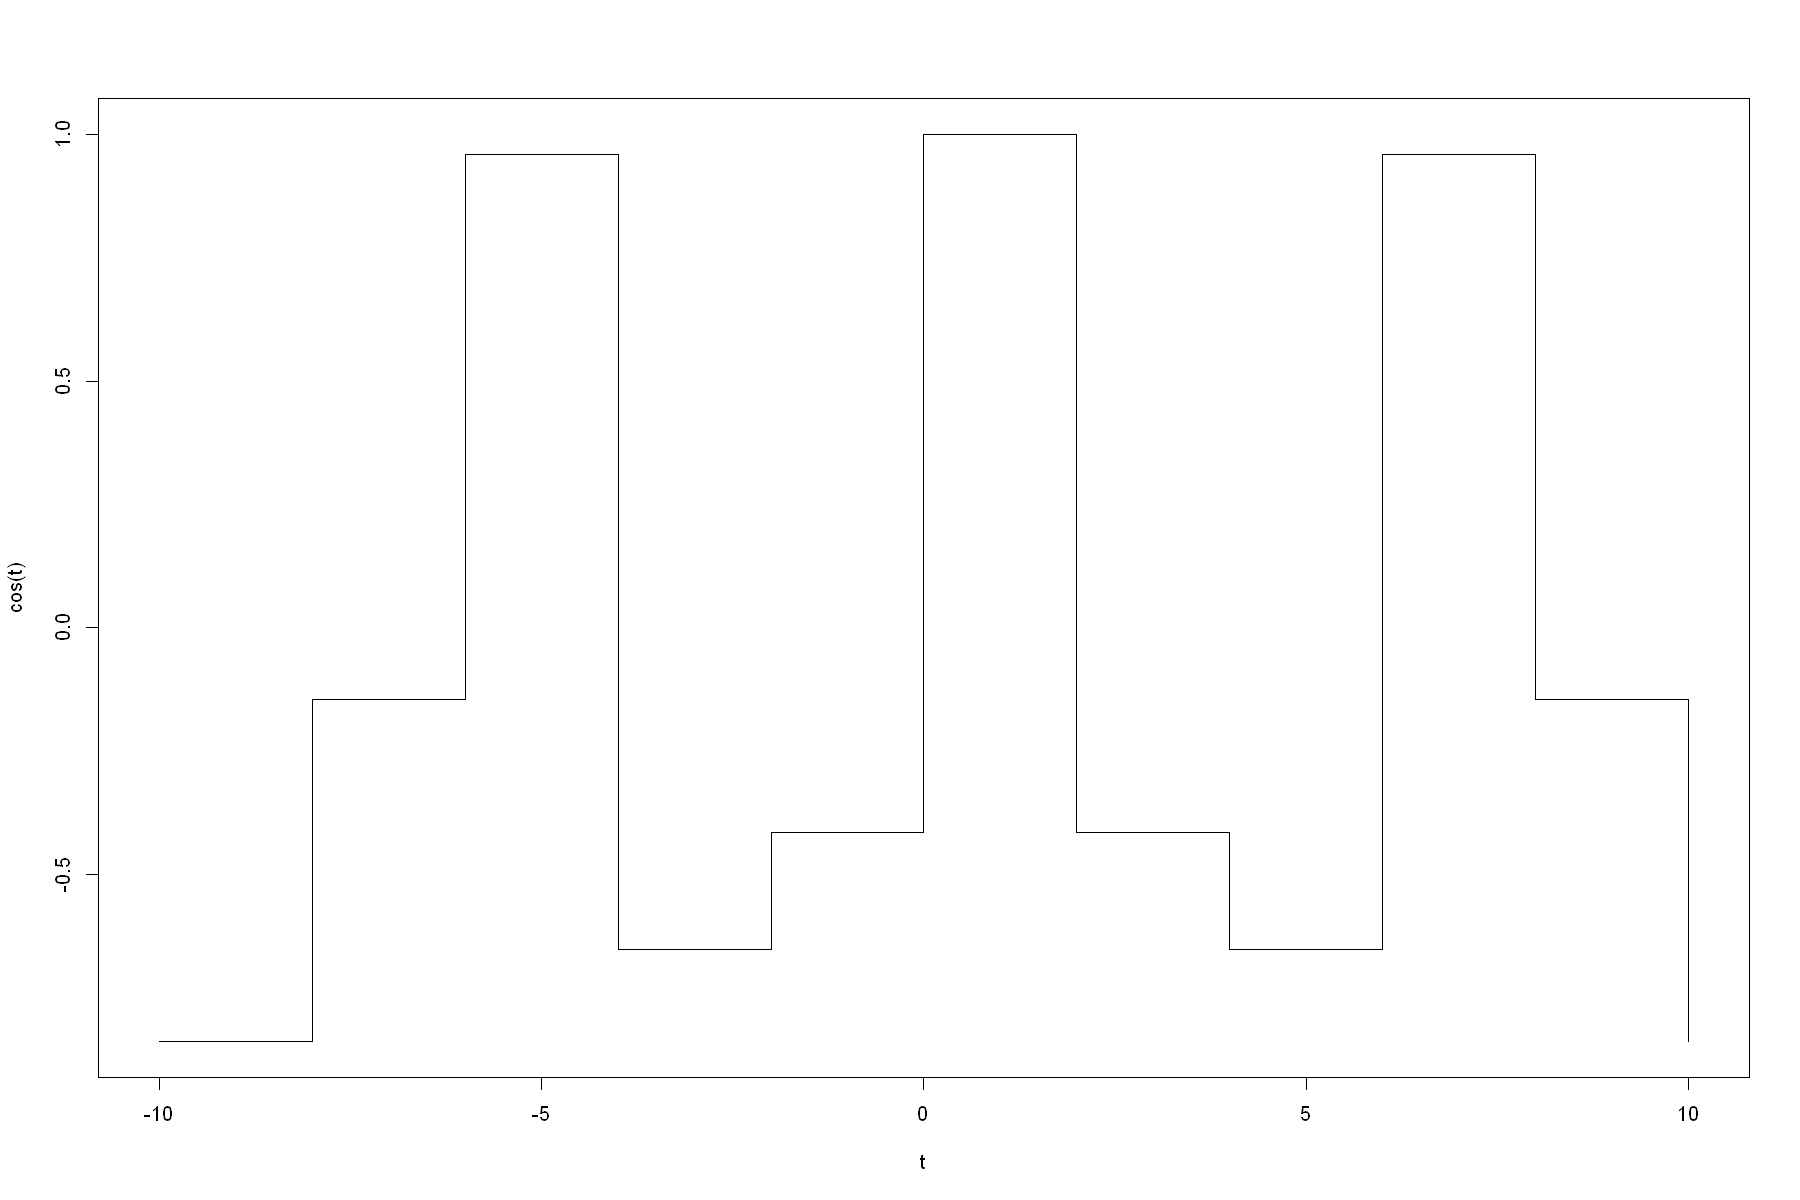

In [16]:
t <- seq(-10, 10, by = 2)
print(t)
plot(t, cos(t), type = 's')

Plotting a function

We will plot
$$ y = \mid 2^x - x^2 \mid, $$

where x is a sequence of even numbers from -10 to 10.

Plot y on the $y$ axis, and x on the $x$ axis. Set the plot type to **line**, color to **red**, leave the axis labels empty, and set the plot title to **Completely irrelevant plot**.

 [1] -10  -8  -6  -4  -2   0   2   4   6   8  10


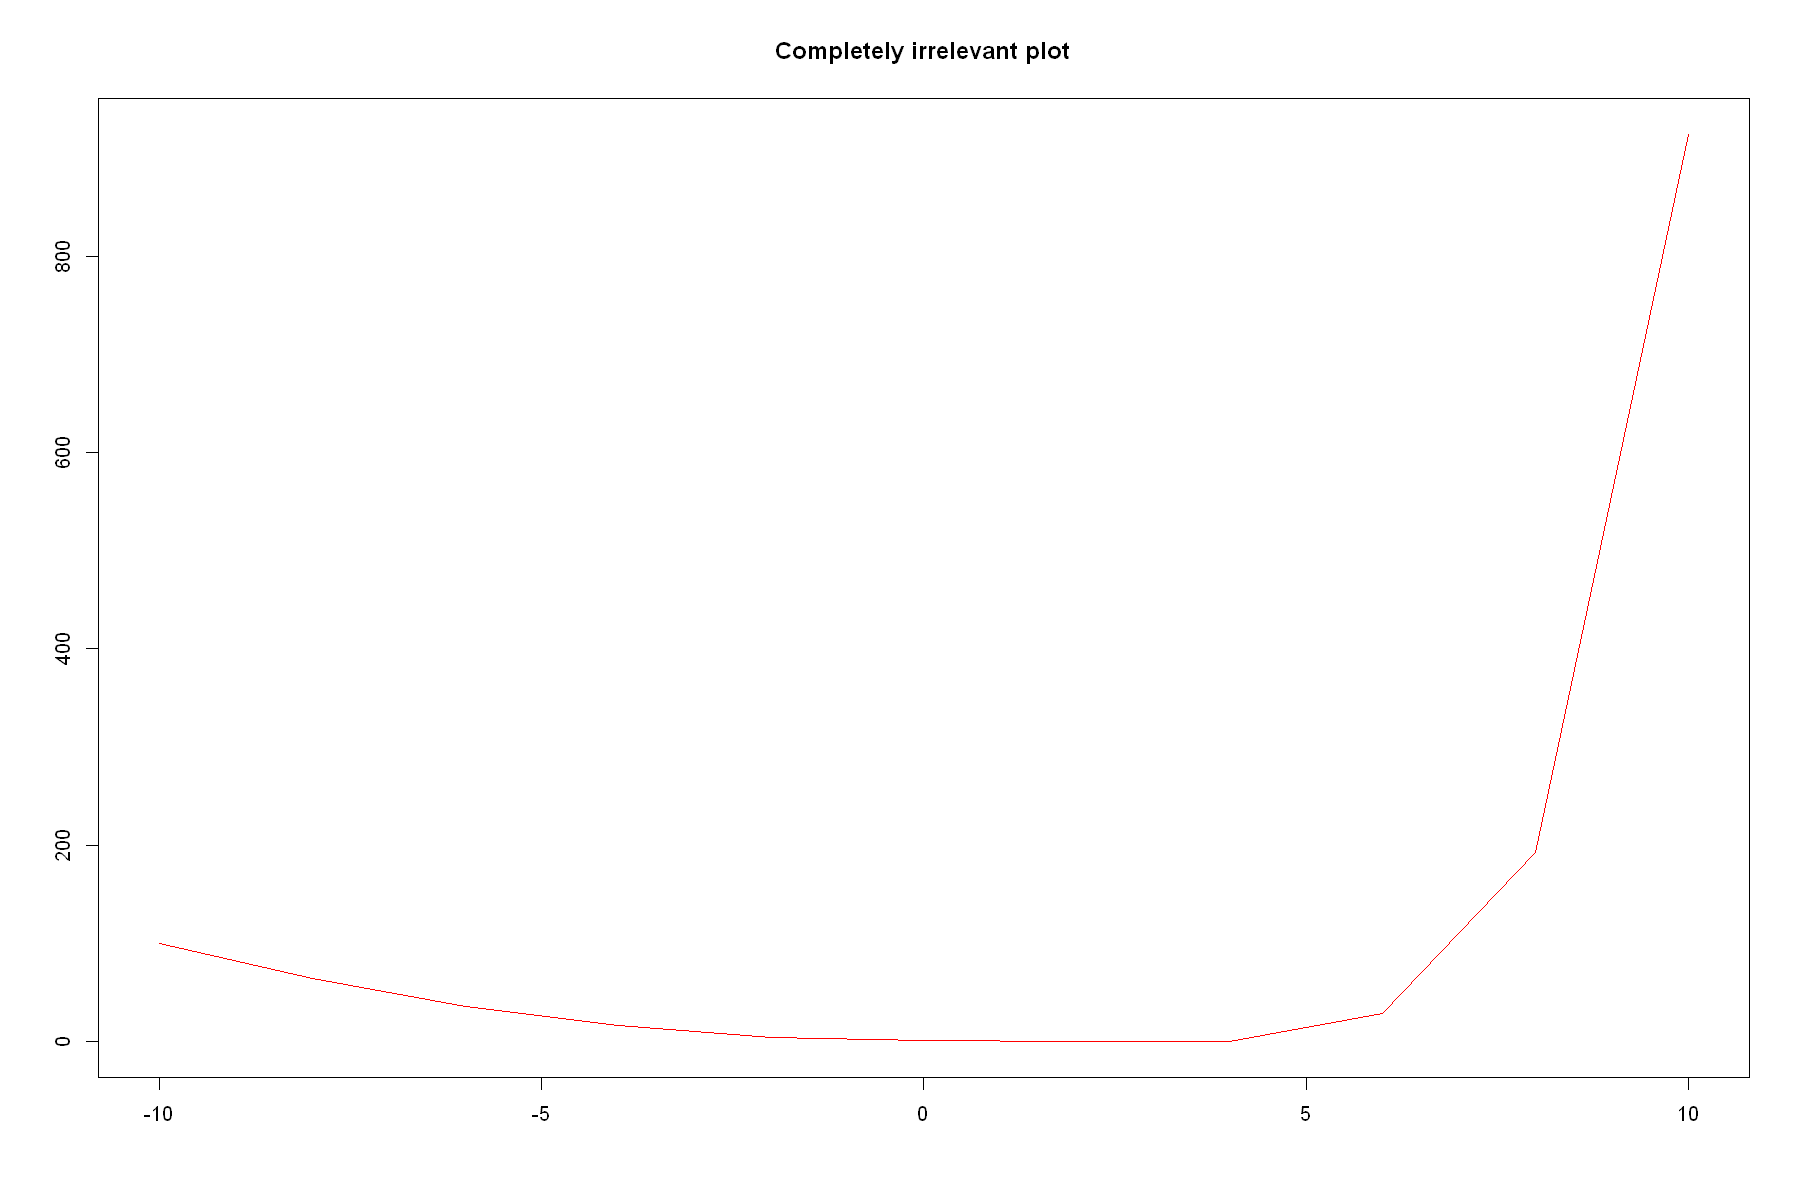

In [27]:
t <- seq(-10, 10, by = 2)
print(t)
plot(t, abs(2^t - t^2), type = 'l', col = 'red', xlab = '', ylab = '', main = 'Completely irrelevant plot')

### Time series simulation

Let's move closer to financial time series. Simulate 100 observations of Gaussian White Noise.


In [5]:
gwn <- rnorm(100, mean = 0)

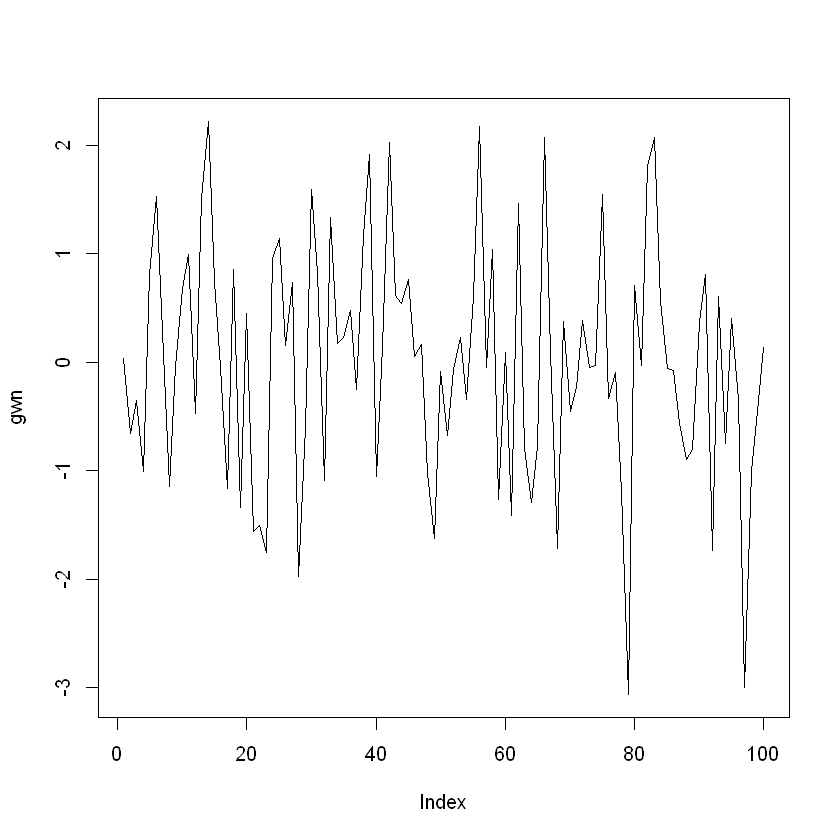

In [6]:
plot(gwn, type = 'l')



Let's plot realization of Gaussian White Noise of length 1000.


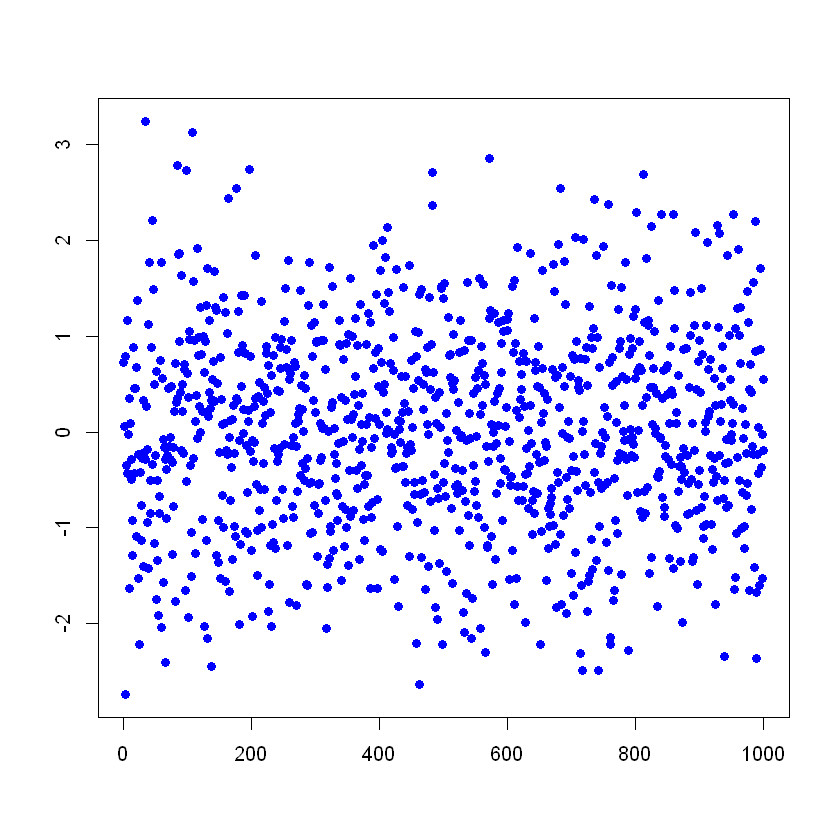

In [7]:
GWN <- rnorm(1000)
plot(GWN, col = 'blue', ylab = NA, xlab = NA, pch = 16)

If you tell *plot* function that your data is a time series, it will provide a line plot by default.

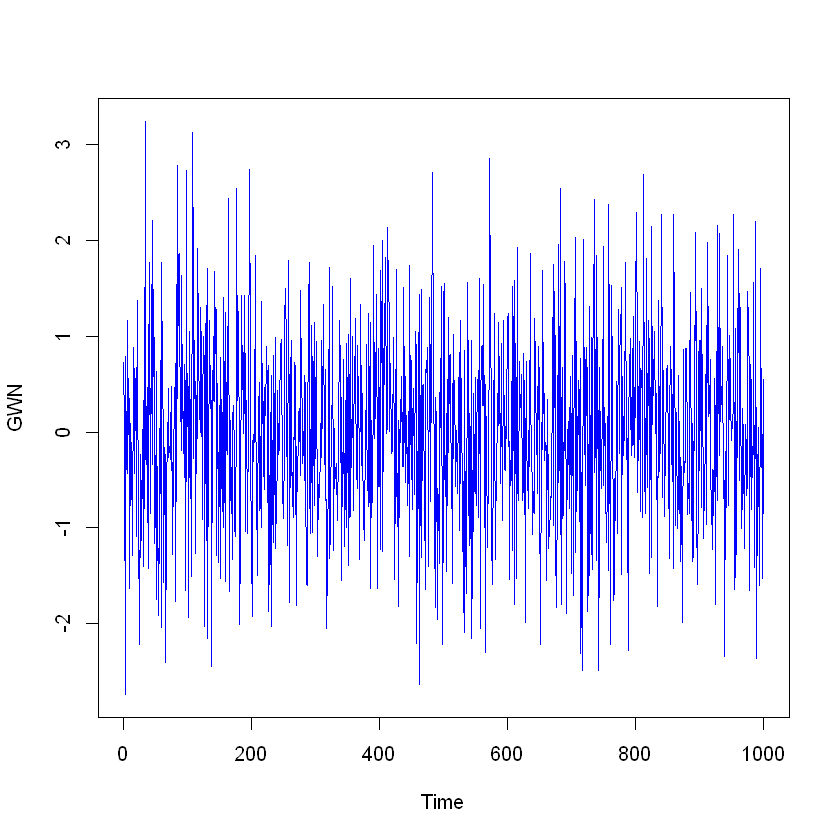

In [8]:
plot.ts(GWN, col = 'blue')

<br>
Change color to red, change label of axis y to magnitude, add a twice enlarged title "Gaussian White Noise".
<br>

<br>
Next, simulate an AR(1) process
$$r_{t} = \phi_{0} + \phi_{1} r_{t-1} + \epsilon_{t}, $$ <br>
where $\epsilon_{t}$ is assumed to be white noise $\epsilon_{t} \sim N(0,\sigma^2)$.
First set $\phi$ parameters and generate white noise $\epsilon$ process.

In [9]:
phi0 <- 0.2
phi1 <- 0.9
eps <- rnorm(501)
ar1 <- vector()
ar1[1] <- phi0

Now everything is prepared, we can iteratively add values to the ar1 vector.

In [10]:
for (t in 2:length(eps)){
    ar1[t] <- phi0 + phi1 * ar1[t - 1] + eps[t]
}

Plot the generated time-series.

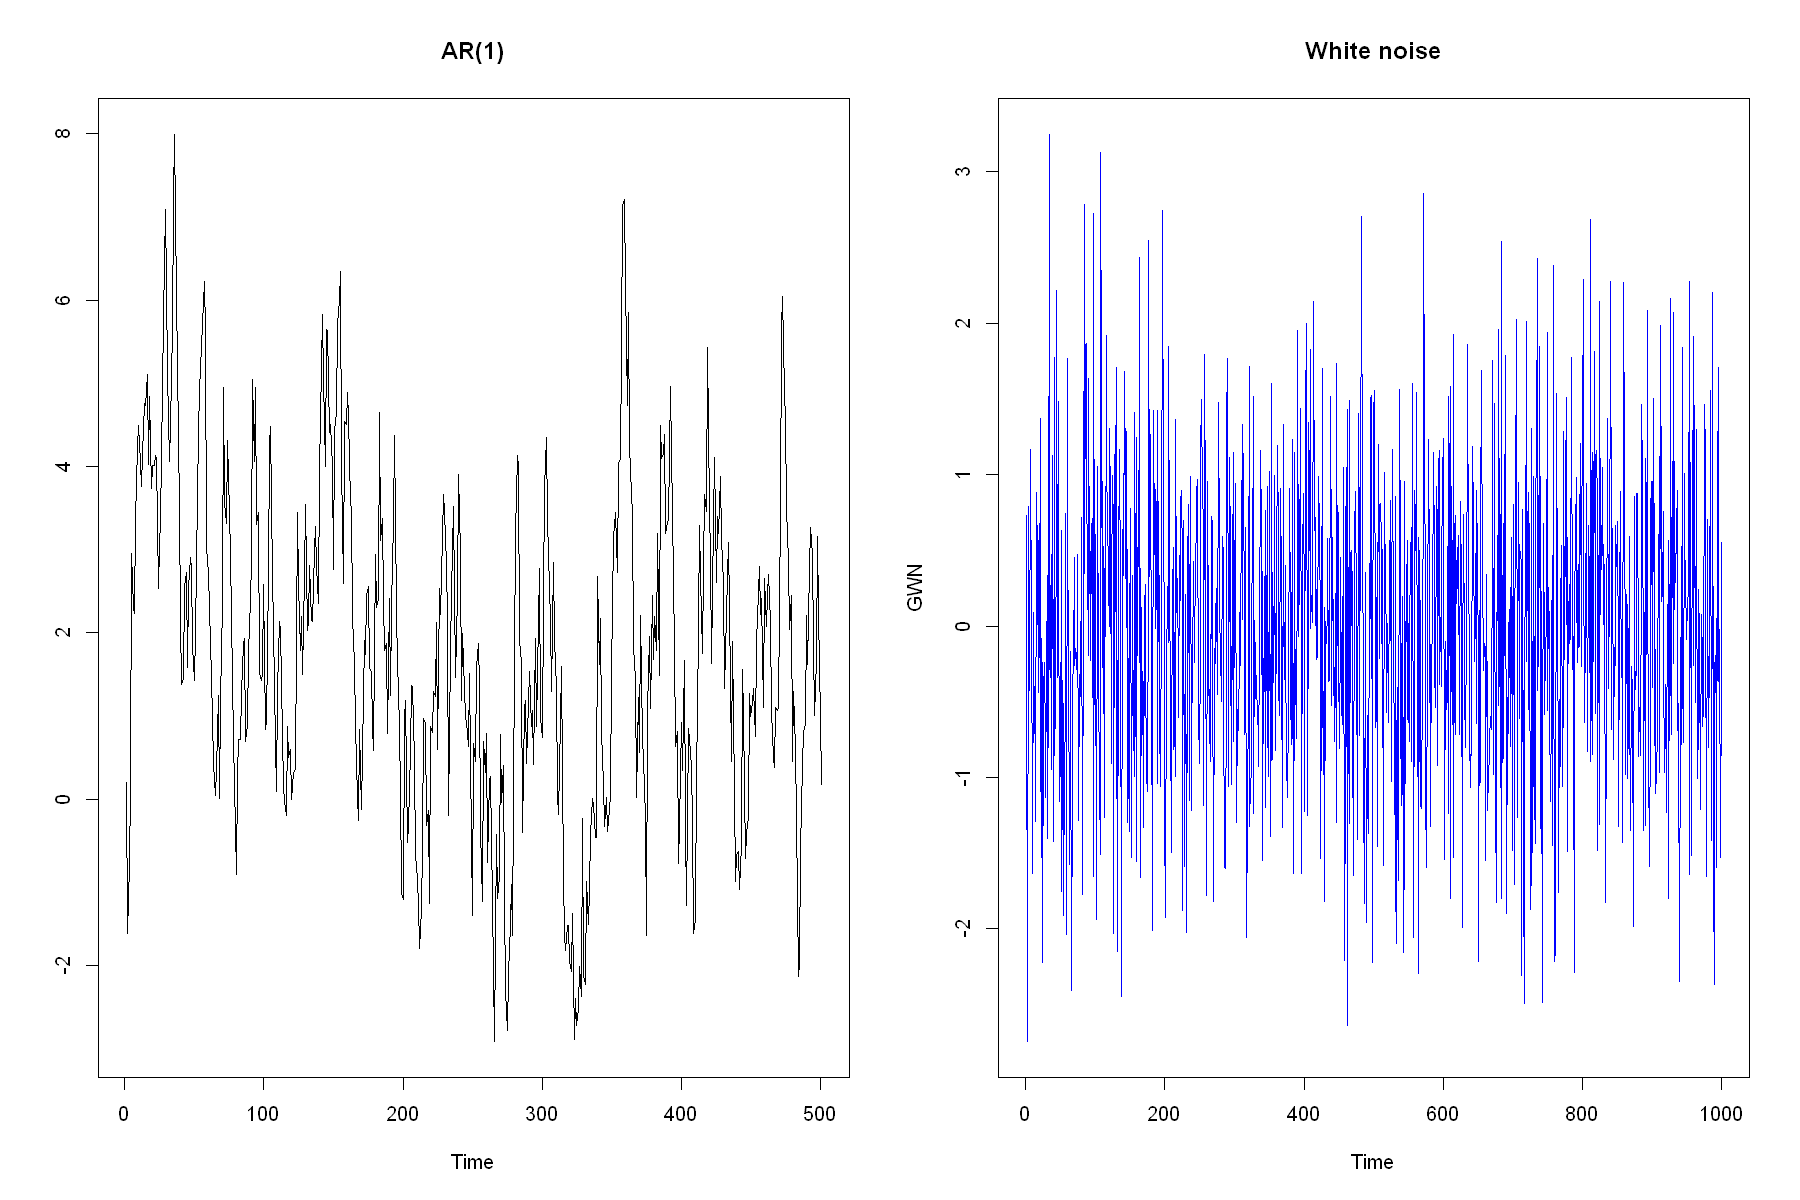

In [11]:
options(repr.plot.width = 15, repr.plot.height = 10)
par(mfrow = c(1, 2))
plot.ts(ar1, ylab = NA, main = "AR(1)")
plot.ts(GWN, col = 'blue', main = 'White noise')


#### Exercise: Simulation

Now generate an AR(2) process

How do we define an AR(2) process?

i) $x_t = \alpha + \beta_1 x_{t - 1} + \beta_2 \epsilon_{t - 1} + \epsilon_t$

ii) $x_t = \alpha + \beta_1 x_{t - 1} + \beta_2 x_{t - 2} + \epsilon_t$  ->  this is an AR(2) process

iii) $x_t = \alpha + \beta_1 \epsilon_{t - 1} + \beta_2 \epsilon_{t - 2} + \epsilon_t$

In [41]:
phi0 <- 0.2
phi1 <- 0.9
phi2 <- 0.5
eps <- rnorm(501)
ar2 <- vector()
ar2[1] <- phi0 + eps[1]
ar2[2] <- phi0 + phi1 + ar2[1] + eps[2]

for (t in 2:length(eps)){
    ar2[t] <- phi0 + phi1 * ar2[t - 1] + phi2 * ar2[t - 2] + eps[t]
}

ERROR: Error in ar2[t] <- phi0 + phi1 * ar2[t - 1] + phi2 * ar2[t - 2] + eps[t]: replacement has length zero


In [42]:
par(mfrow = c(1, 2))
plot.ts(ar1, ylab = NA, main = "AR(1)")
plot.ts(ar2, ylab = NA, main = "AR(2)", col = 'blue')

ERROR: Error in ts(x): 'ts' object must have one or more observations


Try changing the parameters and see, how the processes react.
___

We can also simulate more elaborate processes, for example try ARCH(1). 
<br>
$$a_{t}=\sigma_{t} \epsilon_{t}, $$
$$\sigma_{t}^2 = \alpha_{0} + \alpha_{1} a_{t-1}^2, $$
where $\alpha_{0} > 0$ and $\alpha_{1}\geq 0$. <br>
Again generate parameters first, and $\epsilon$ first.

In [43]:
alpha0 <- 0.1
alpha1 <- 0.5
eps <- rnorm(501)
a <- vector()
sigma <- vector()
sigma[1] <- var(eps)
a[1] <- sqrt(sigma[1]) * eps[1]

Now we can again iteratively write to the vectors using the initial values sigma[1] and a[1].

In [44]:
for (t in 2:length(eps)){
    sigma[t] <- alpha0 + alpha1 * a[t - 1]^2
    a[t] <- sqrt(sigma[t]) * eps[t]
}

Now we have time series of simulated "returns" and simulated volatility. We can plot them next to each other using *par*.

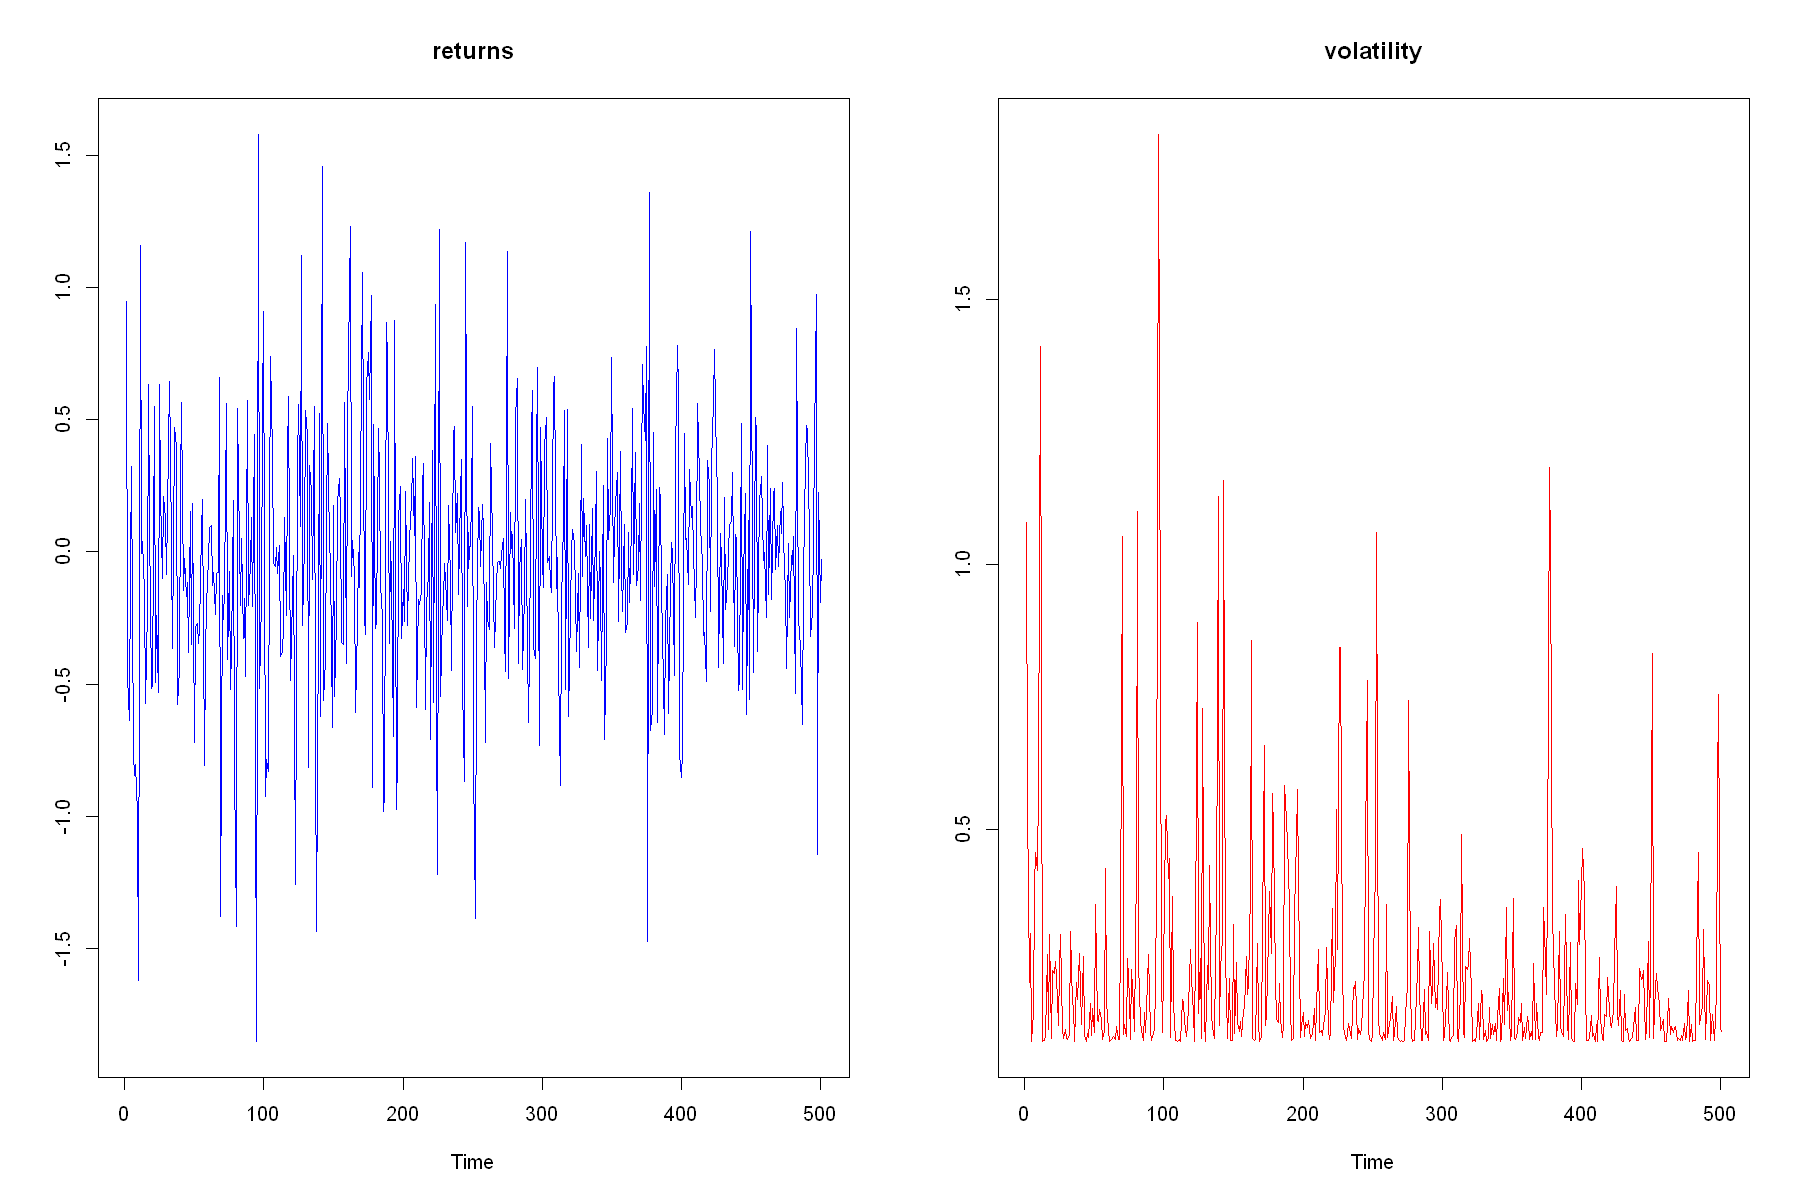

In [45]:
par(mfrow = c(1, 2))
plot.ts(a,main="returns",ylab=NA,col='blue')
plot.ts(sigma,main="volatility",ylab=NA,col='red')

Or we can divide the figure horizontaly.

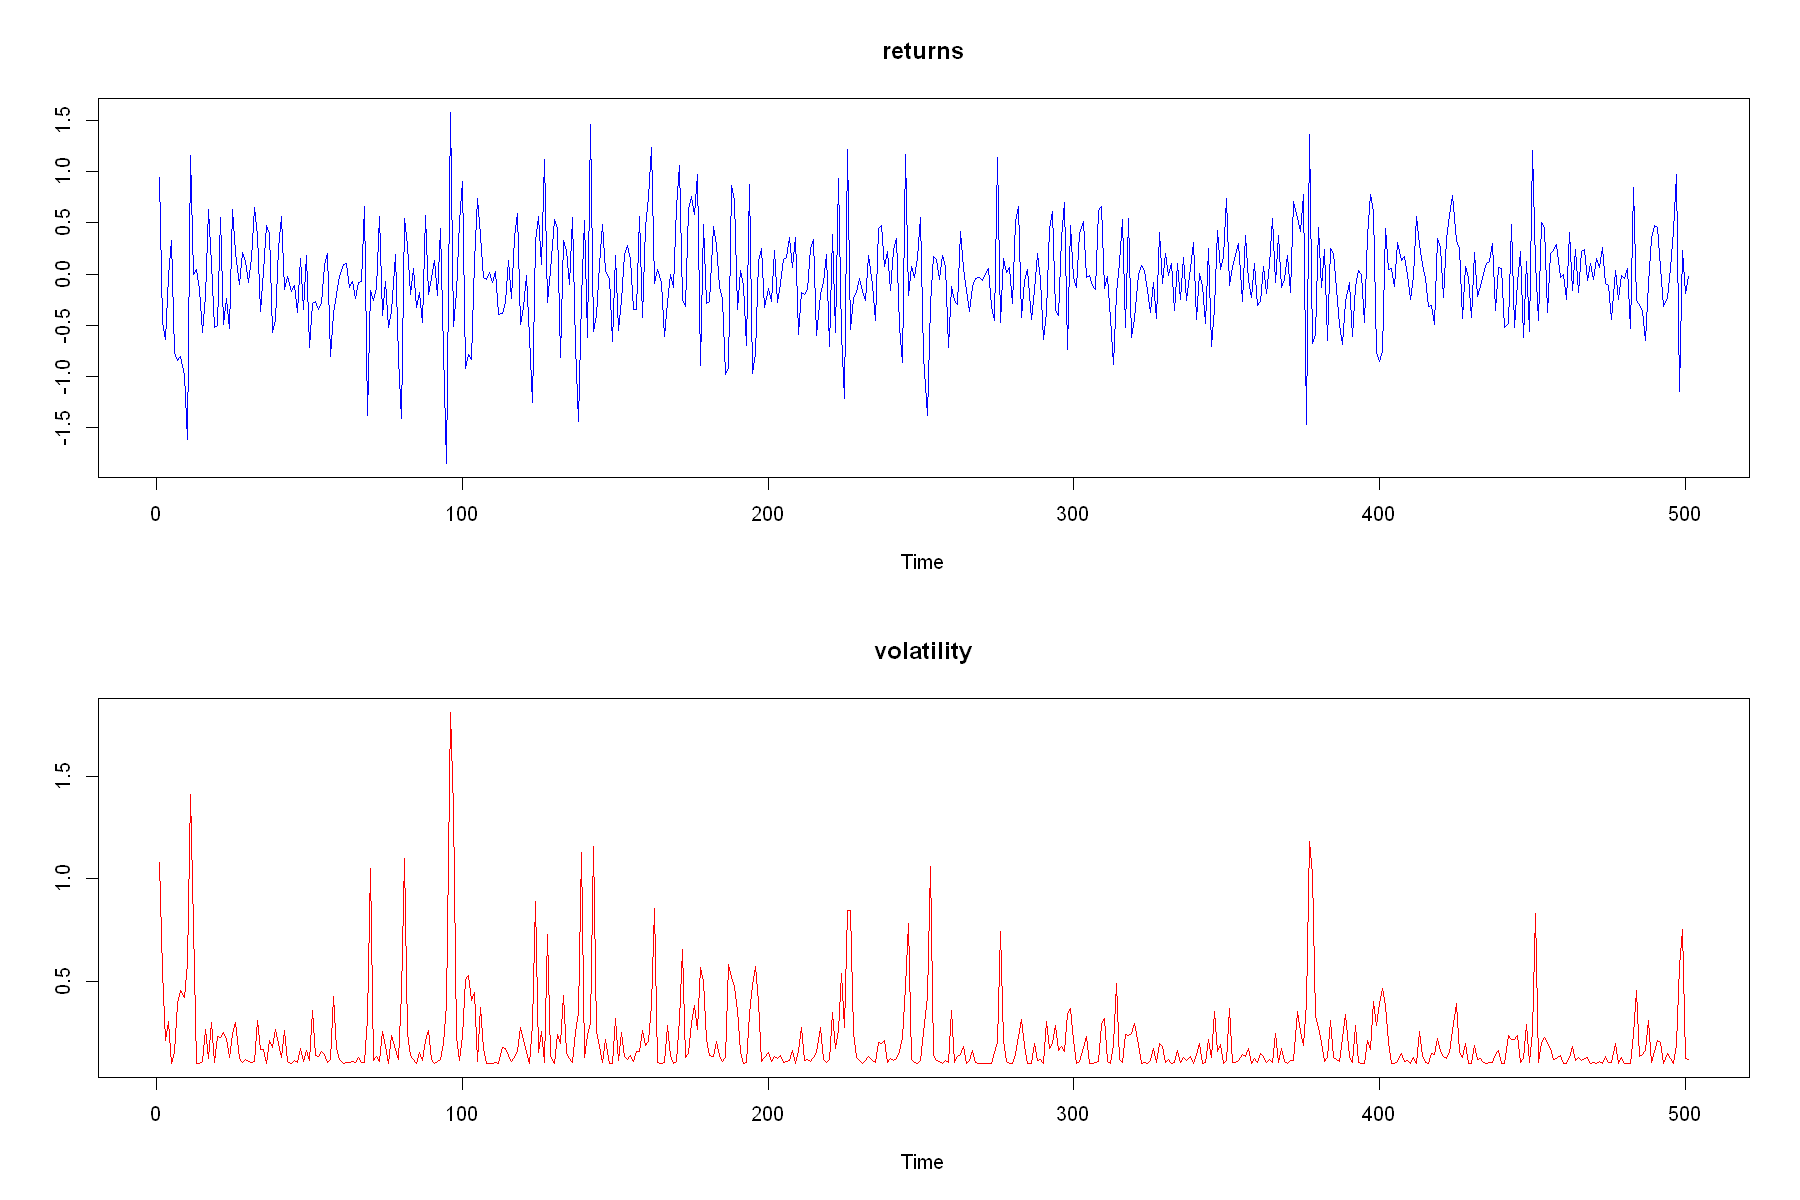

In [46]:
par(mfrow = c(2, 1))
plot.ts(a, main = "returns", ylab = NA, col = 'blue')
plot.ts(sigma, main = "volatility", ylab = NA, col = 'red')

### Working with real-world financial data

Nowadays, it is not as easy as it used to be to download financial data directly via R. Probably the most complete tool in that respect is package [BatchGetSymbols](https://cran.r-project.org/web/packages/BatchGetSymbols/BatchGetSymbols.pdf). A little bit more limited supply of data is offered by [quantmod](https://cran.r-project.org/web/packages/quantmod/quantmod.pdf) package. However, it suits our today's purpose well as it is more intuitive to use.

To install packages in R, use install.packages("Package_name") command. After starting R, you need to always load already installed packages using library("Package_name") before using them.

In [28]:
# install.packages("quantmod")
library("quantmod")

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.


#### S&P 500 index

Let's start by downloading prices of the S&P 500 index.

In [47]:
getSymbols('SP500', src = 'FRED', return.class = 'xts')
head(SP500)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "SP500"

             SP500
2014-02-21 1836.25
2014-02-24 1847.61
2014-02-25 1845.12
2014-02-26 1845.16
2014-02-27 1854.29
2014-02-28 1859.45

<br>
Plot the prices of S&P 500.

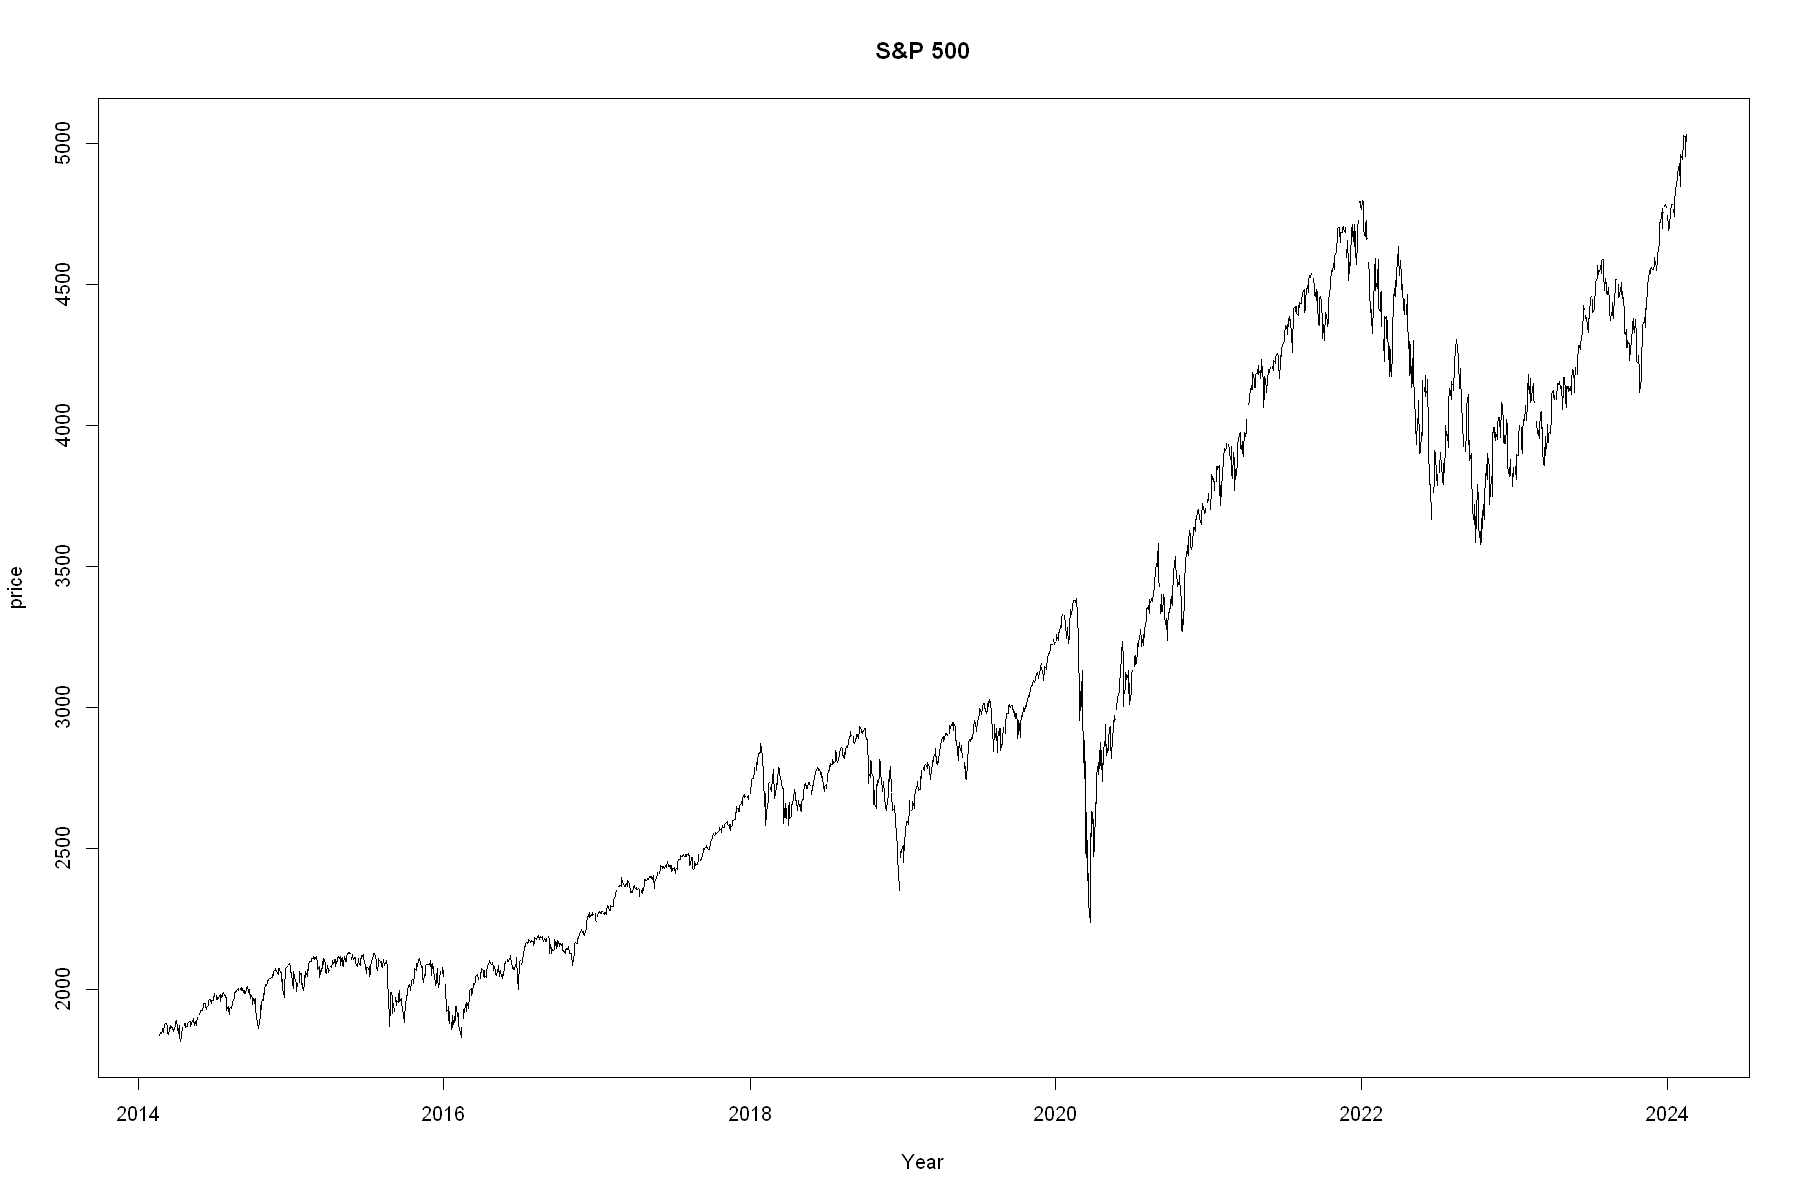

In [49]:
plot(as.Date(index(SP500)), SP500, type = 'l', xlab = 'Year',
     ylab = 'price', main = 'S&P 500')

In most econometric applications, we are more interested in returns than prices themselves. Let's compute logarithmic returns of S&P 500, and plot them.

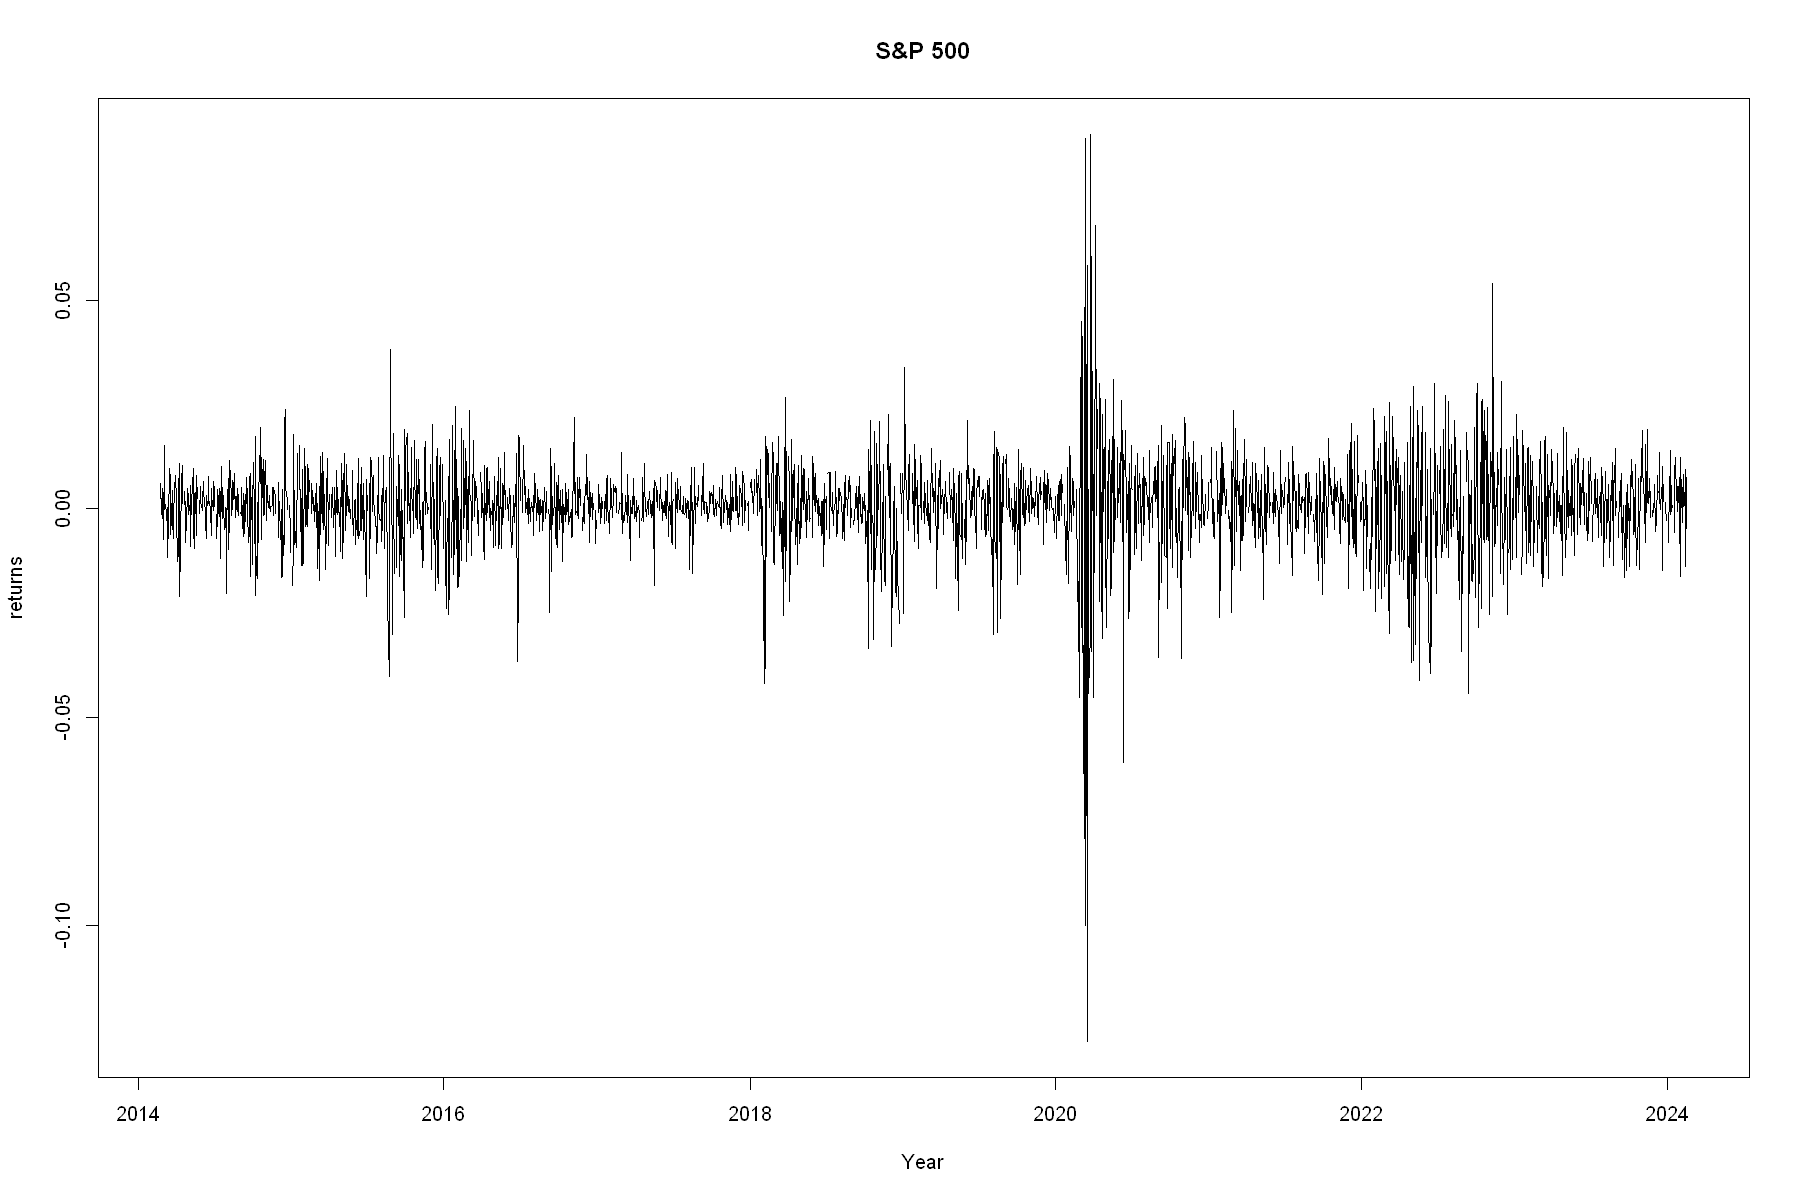

In [50]:
lretSP500 <- diff(log(SP500), 1)
plot(as.Date(index(lretSP500)), lretSP500, type = 'l', xlab = 'Year',
     ylab = 'returns', main = 'S&P 500')

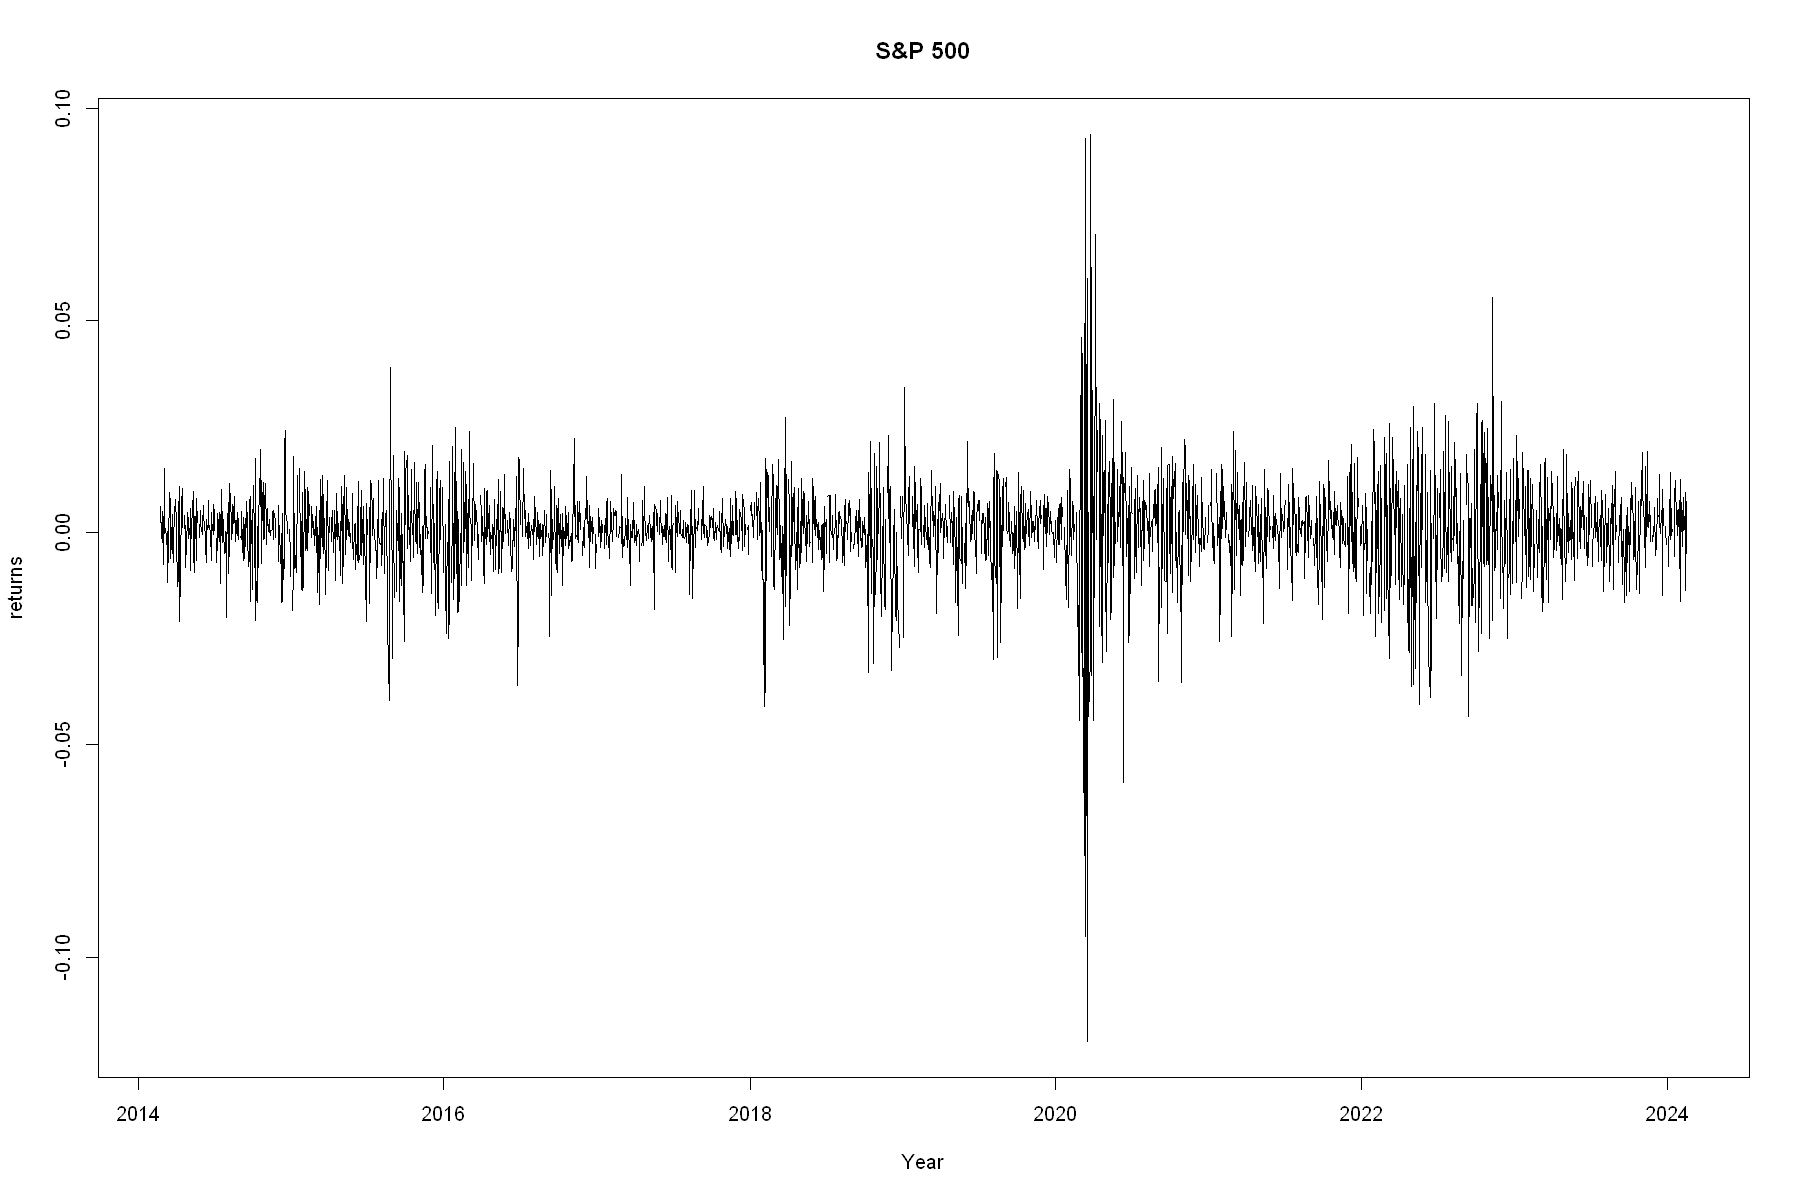

In [51]:
returnsSP <- diff(SP500)/lag(SP500)
plot(as.Date(index(returnsSP)), returnsSP, type = 'l', xlab = 'Year',
     ylab = 'returns', main = 'S&P 500')

Now, we download the data of e.g. Microsoft

In [59]:
#update.packages('quantmod')
library('quantmod')
getSymbols('MSFT', verbose = TRUE)

ERROR: Error in new.session(): Could not establish session after 5 attempts.


We will be interested only in data from years 2010-2015.

In [60]:
MSFT <- MSFT[index(MSFT) > as.Date("2009-12-31") & 
             index(MSFT) < as.Date("2016-01-01")]

ERROR: Error in eval(expr, envir, enclos): object 'MSFT' not found


In [ ]:
plot(as.Date(index(MSFT)), MSFT, type = 'l', xlab = 'Year', 
     ylab = 'price', main = 'Microsoft')

Why does that not work? Let's examine the data.

In [ ]:
head(MSFT)

<br>
Unlike S&P 500, calling for Microsoft prices gives us more columns. Plot the closing price.

In [ ]:
plot(as.Date(index(MSFT)), MSFT[, 'MSFT.Close'], type = 'l',
     xlab = 'Year', ylab = 'price', main = 'Microsoft')

And trading volume.

In [ ]:
plot(as.Date(index(MSFT)), MSFT[, 'MSFT.Volume'], type = 'h', 
     xlab = 'Year', ylab = 'Volume', main = 'Microsoft', col = 'salmon')

You can use R also to find out the latest quotes of stock prices, exchange rates, and more. Just use the getQuote function.

In [61]:
getQuote("MSFT")

Warning message in download.file(paste0("https://query1.finance.yahoo.com/v7/finance/quote?symbols=", :
"cannot open URL 'https://query1.finance.yahoo.com/v7/finance/quote?symbols=MSFT&fields=regularMarketPrice,regularMarketChange,regularMarketChangePercent,regularMarketOpen,regularMarketDayHigh,regularMarketDayLow,regularMarketVolume': HTTP status was '401 Unauthorized'"

ERROR: Error in download.file(paste0("https://query1.finance.yahoo.com/v7/finance/quote?symbols=", : cannot open URL 'https://query1.finance.yahoo.com/v7/finance/quote?symbols=MSFT&fields=regularMarketPrice,regularMarketChange,regularMarketChangePercent,regularMarketOpen,regularMarketDayHigh,regularMarketDayLow,regularMarketVolume'


In [ ]:
getQuote("EURCZK=X")
getQuote("EURUSD=X")
getQuote("EURIRR=X")

### Descriptive statistics for S&P 500

Let's work with S&P 500 logarithmic returns.

In [ ]:
SP500 <- diff(log(SP500))

In [ ]:
hist(SP500, 50)

In [ ]:
mean(SP500)

why it does not work?

In [ ]:
head(SP500)


We need to first have data ready

In [ ]:
head(na.omit(SP500))

In [ ]:
m <- mean(na.omit(SP500))
std <- sd(na.omit(SP500))

print(c(m, std))

In [ ]:
hist(SP500, 100, prob = TRUE)
x <- seq(-.1, .1 , 0.001)
lines(x, dnorm(x, mean = m, sd = std), lwd = 2, col = 'darkblue')

### Fitting Stable distributions

In [63]:
install.packages("stabledist")
library("stabledist")

package 'stabledist' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\janhr\AppData\Local\Temp\RtmpId845z\downloaded_packages


Warning message:
"package 'stabledist' was built under R version 3.6.3"

There are many packages with great help, you just need to search

[Stable distribution](https://en.wikipedia.org/wiki/Stable_distribution)

Following help of stabledist package, we can quickly estimate fit of SP500 data

In [64]:
set.seed(1953)
r <- rstable(n = 1000, alpha = 1.9, beta = 0.3)

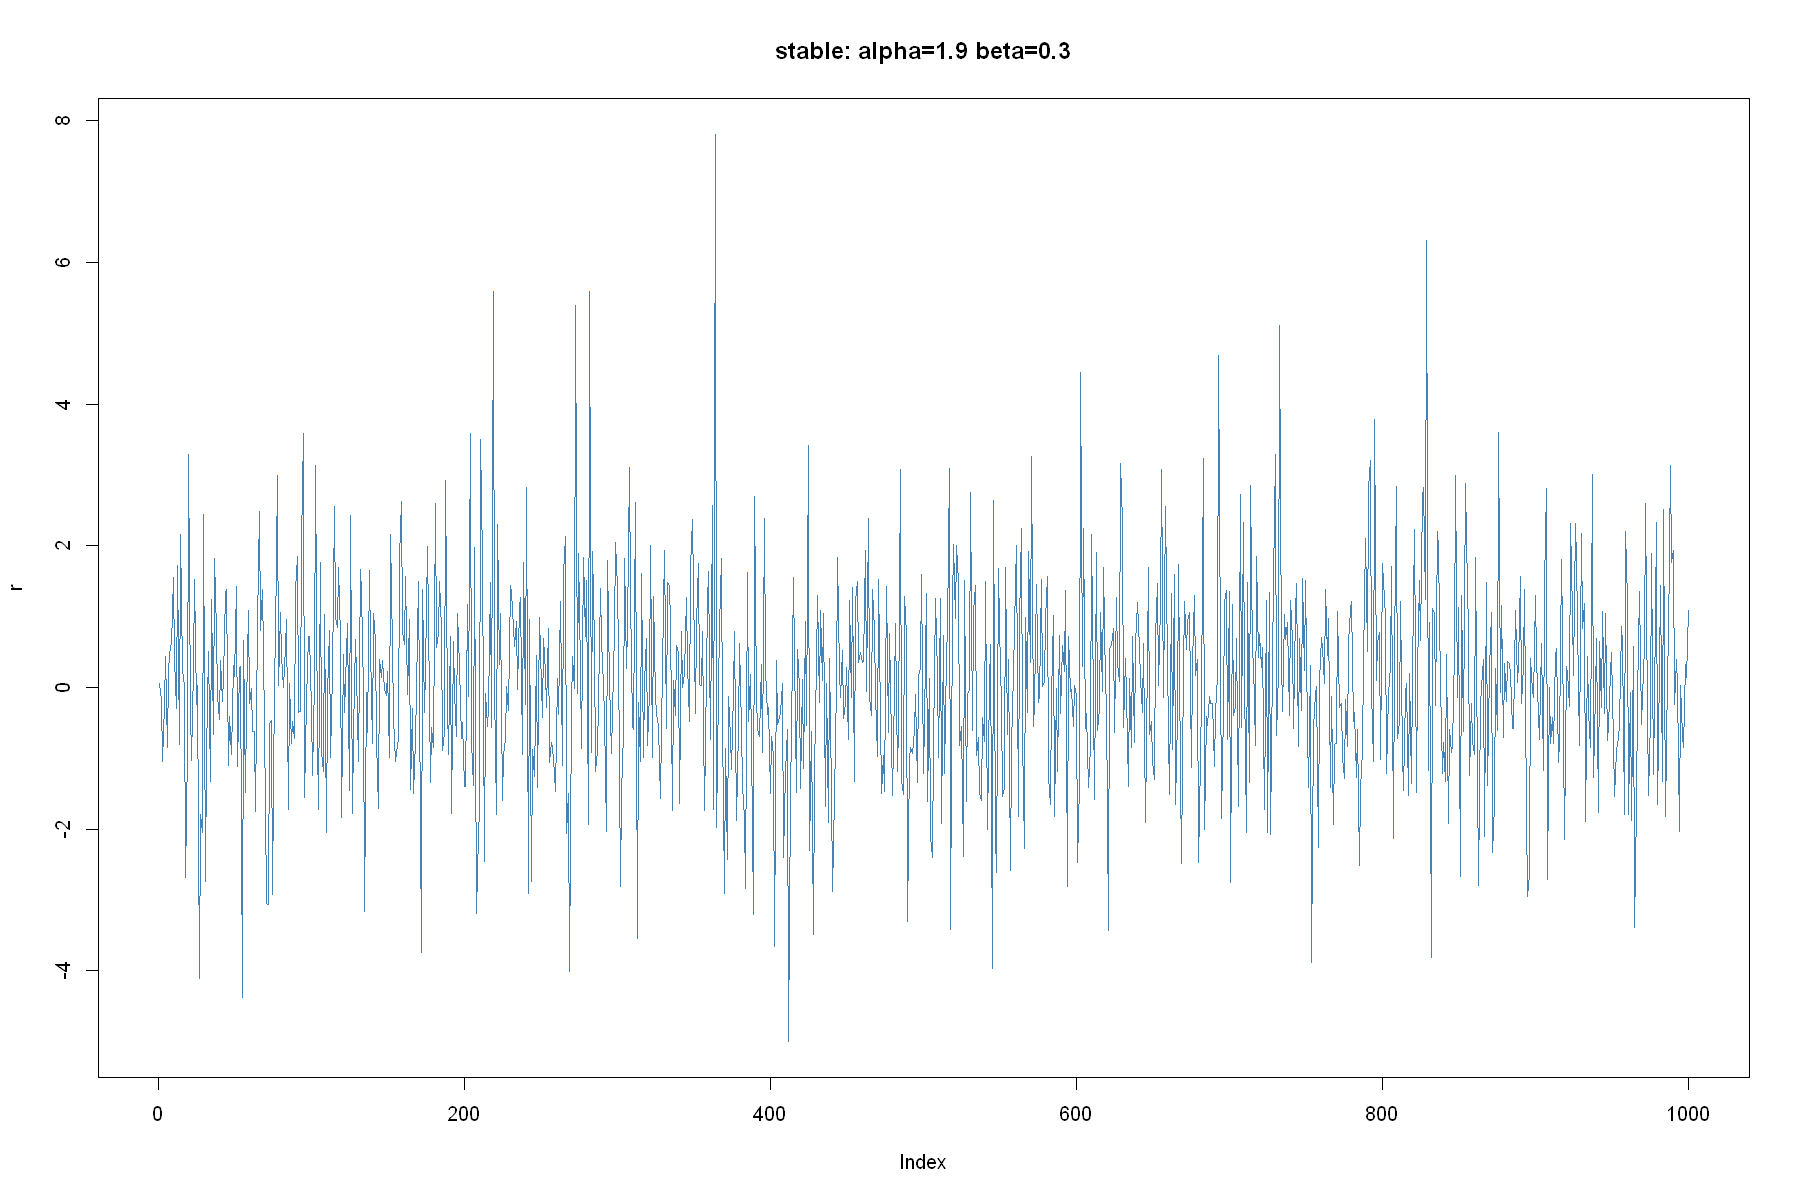

In [65]:
plot(r, type = "l", main = "stable: alpha=1.9 beta=0.3", 
     col = "steelblue")

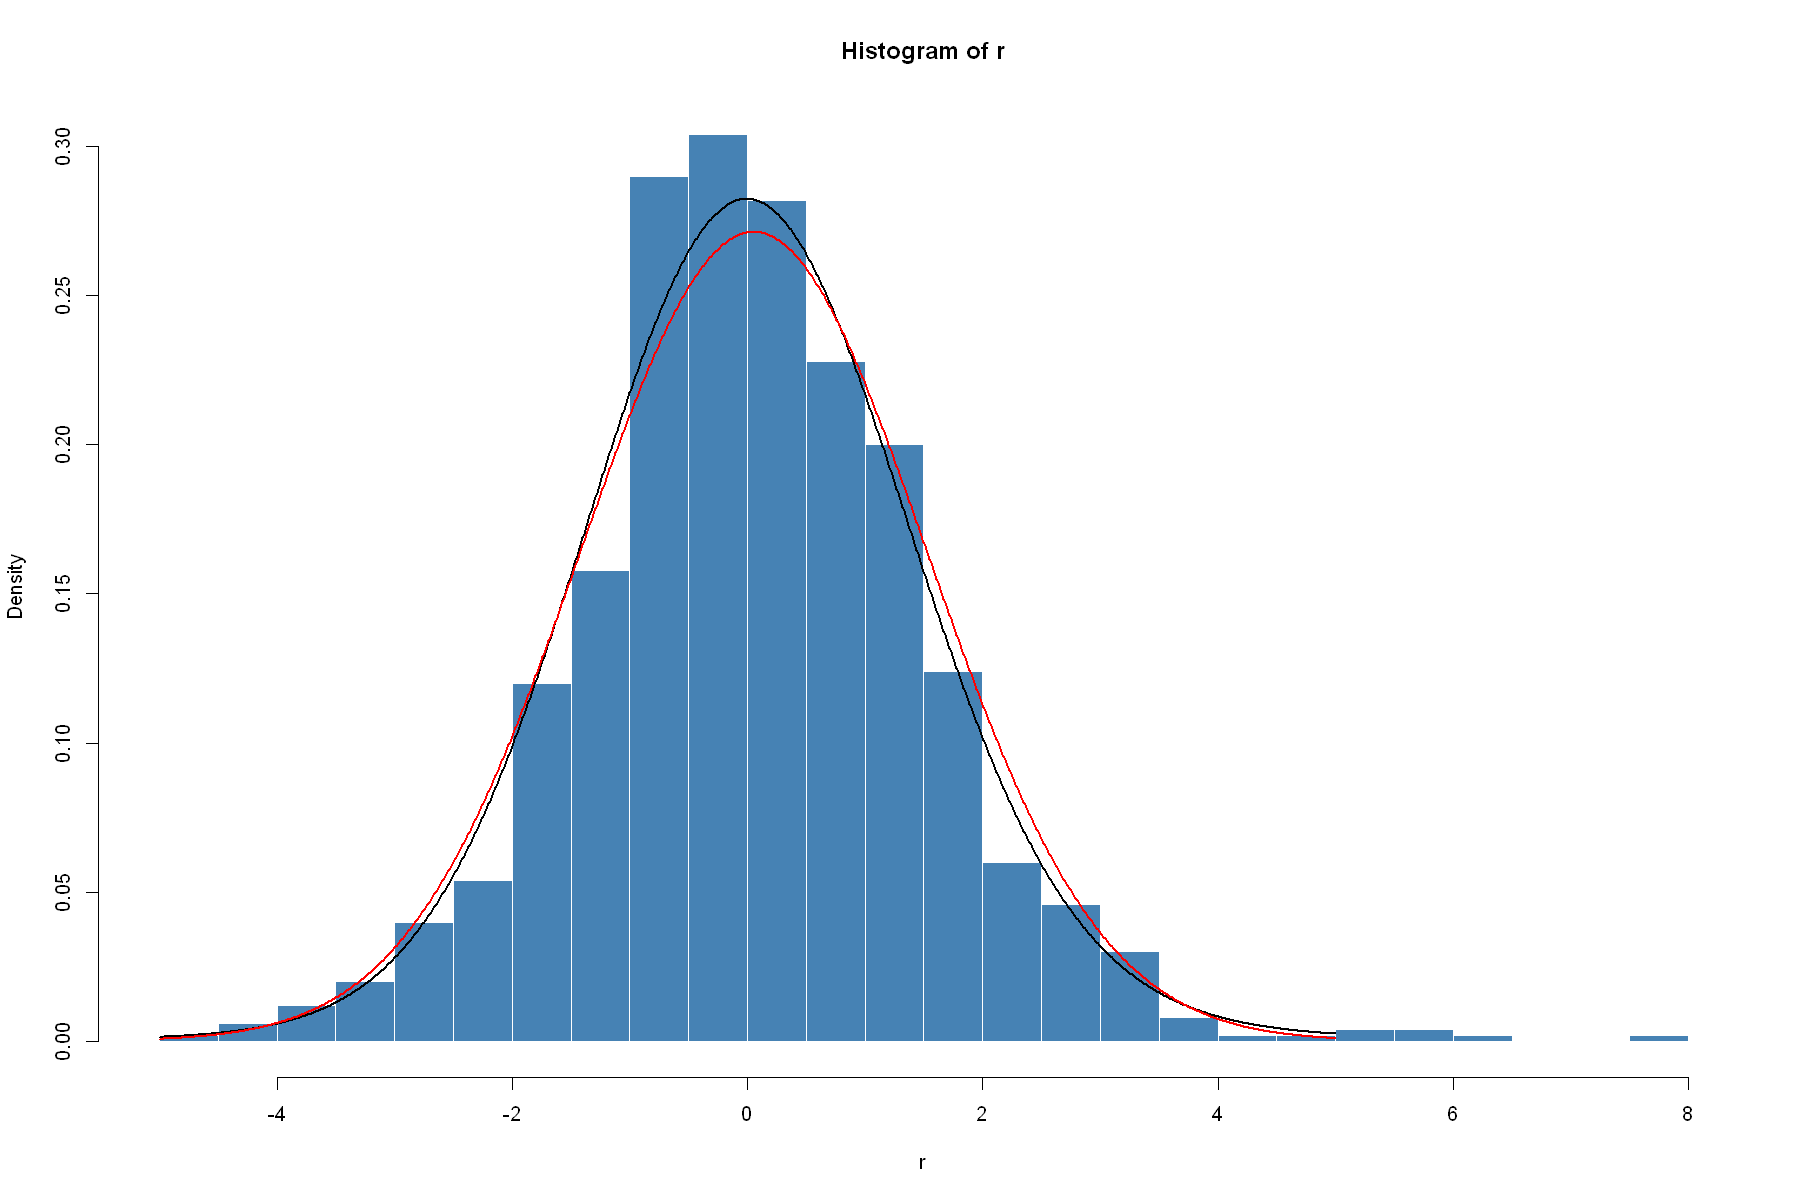

In [66]:
hist(r, n = 25, probability = TRUE, border = "white", 
     col = "steelblue")
x <- seq(-5, 5, 0.01)
lines(x, dstable(x, alpha = 1.9, beta = 0.3, tol= 1e-3), lwd = 2)
m <- mean(r)
std <- sd(r)
lines(x, dnorm(x, mean = m, sd = std), lwd = 2, col = 'red')

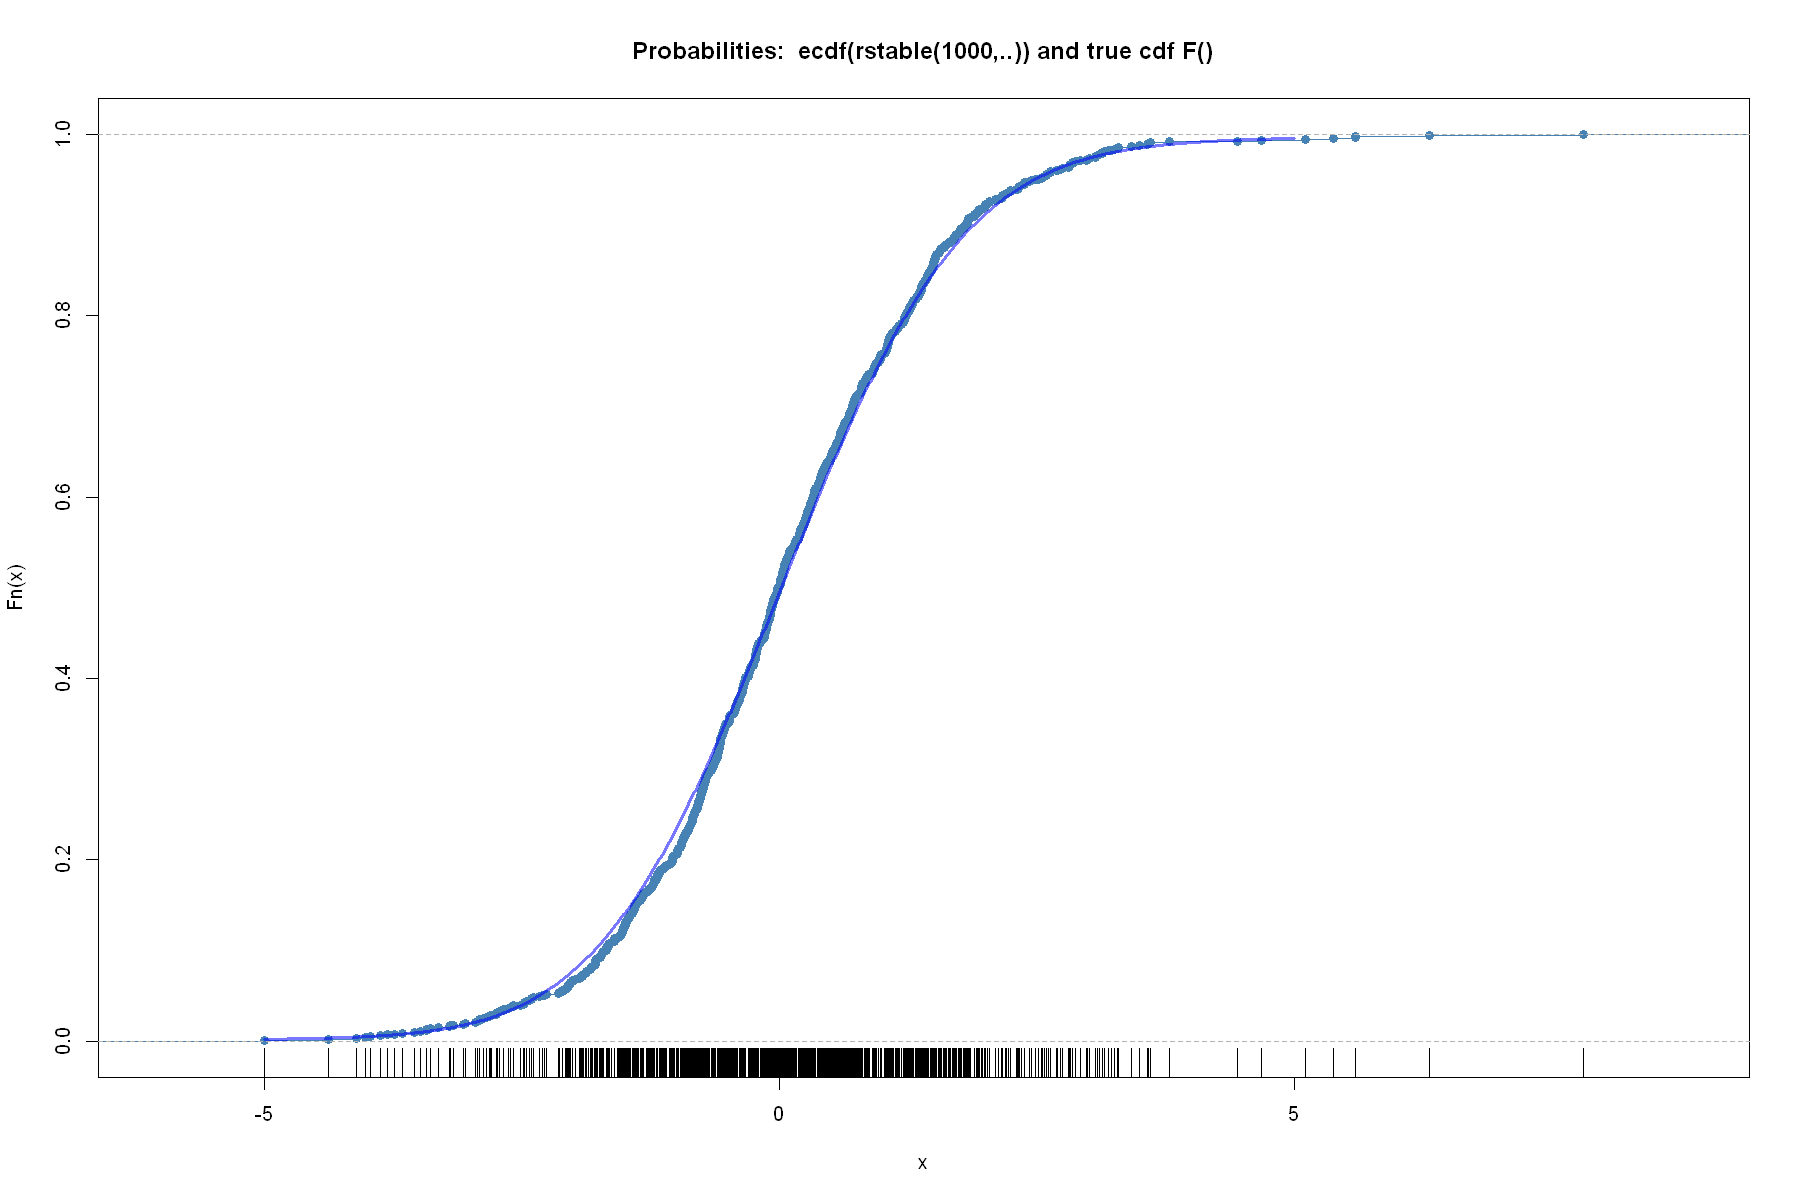

In [67]:
plot(ecdf(r), do.points=TRUE, col = "steelblue",
     main = "Probabilities:  ecdf(rstable(1000,..)) and true cdf F()")
rug(r)
lines(x, pstable(q = x, alpha = 1.9, beta = 0.3), 
      col = "#0000FF88", lwd = 2.5)


### Now real data

First we need to find parameters

In [68]:
#install.packages("StableEstim")
library("StableEstim")


ERROR: Error in library("StableEstim"): there is no package called 'StableEstim'


check if it works on simulated data

In [ ]:
set.seed(1953)
r <- rstable(n = 1000, alpha = 1.9, beta = 0.3)

objKout <- Estim(EstimMethod = "Kout", data = r, pm = 0,
                         ComputeCov = FALSE, HandleError = FALSE,
                         spacing = "Kout")
objKout

Now on real data

In [ ]:
ret <- na.omit(SP500)

objKout <- Estim(EstimMethod = "Kout", data = ret, pm = 0,
                         ComputeCov = FALSE, HandleError = FALSE,
                         spacing = "Kout")
objKout

In [ ]:
ret <- as.numeric(na.omit(SP500))

objKout <- Estim(EstimMethod = "Kout", data = ret, pm = 0,
                         ComputeCov = FALSE, HandleError = FALSE,
                         spacing = "Kout")
objKout

In [ ]:
objKout@par[1]

In [ ]:
#plot(ret, type = "l", main = "stable: SP500",col = "steelblue")
hist(ret, n = 50, probability = TRUE, border = "white",
     col = "steelblue")
x <- seq(-0.1, 0.1, 0.001)
m <- mean(na.omit(SP500))
std <- sd(na.omit(SP500))
lines(x, dstable(x, alpha = objKout@par[1], beta = objKout@par[2], 
    gamma=objKout@par[3], delta=objKout@par[4],tol= 1e-3), lwd = 2)
lines(x, dnorm(x, mean = m, sd = std), lwd = 2, col = 'red')

### Working with multiple time series

I would like to load multiple symbols, and compute logarithmic returns. Then we will assess the time series graphically, compute the descriptive statistics and observe the histograms.

In [ ]:
symbols <- c('MSFT', 'AAPL', 'GOOG', 'AMZN', 'NFLX', 'TSLA')

In [ ]:
data <- list(getSymbols(symbols))

In [ ]:
data

Load the data into a list.

In [ ]:
data <- lapply(symbols, function(y){
    getSymbols(y, auto.assign = FALSE)
})

In [ ]:
names(data) <- symbols

In [ ]:
lapply(data, head)

In [ ]:
head(data$TSLA)

Data since the start of 2015

In [ ]:
data <- lapply(symbols, function(y){
    getSymbols(y, auto.assign = FALSE, from = as.Date('2015-01-01'), to = '2021-12-31')
})

In [ ]:
head(data[[1]])
tail(data[[1]])

In [ ]:
cols <- lapply(data, function(y){
    colnames(y)[4]
})

In [ ]:
cols

In [ ]:
data <- lapply(data, function(y){
    y <- y[, 4]
})

In [ ]:
lapply(data, head)

Discard all the columns but the closing price.

In [ ]:
paste0(symbols, '.Close')

In [ ]:
names(data) <- symbols
data <- lapply(names(data), function(y){
    data[[y]] <- data[[y]][, paste0(y, '.Close')]
})

In [ ]:
lapply(data, head)

In [ ]:
data <- lapply(data, function(y){
  y <- na.omit(diff(log(y)))  
})

In [ ]:
lapply(data, head)

In [ ]:
sapply(data, plot)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)

In [ ]:
par(mfrow = c(2, 3))
sapply(data, function(y){
    plot(as.Date(index(y)), y, type = 'l', xlab = 'Year',
     ylab = 'returns')
})

For most application in financial econometrics it is important to have data with matching timmestamps. First, we will find the dates that are common for all the symbols.

In [ ]:
dates <- index(data[[1]])
length(dates)
for (i in 2:length(data)){
    dates <- index(data[[i]])[index(data[[i]]) %in% dates]
}

Check if this works correctly.

In [ ]:
length(dates)

In [ ]:
data <- lapply(data, function(y){
    y[index(y) %in% dates]
    })

Check the lenghts.

In [ ]:
lapply(data, nrow)

Check randomly if the observations are matching.

In [ ]:
lapply(data, function(y){
    y[1459]
})

Compute the summary statistics (we compute mean, standard deviation, minimum and maximum).

In [ ]:
stats <- lapply(data, function(y){
    c(mean(y), sd(y), min(y), max(y))
})

In [ ]:
stats

In [ ]:
stats <- sapply(stats, function(y){
    round(y, 4)
    })

In [ ]:
rownames(stats) <- c('mean', 'sd', 'min', 'max')
colnames(stats) <- symbols

In [ ]:
t(stats)

And observe the histograms.

In [ ]:
par(mfrow = c(2, 3))
sapply(data, function(y){
hist(y, 50, prob = TRUE)
x <- seq(-.1, .1 , 0.001)
lines(x, dnorm(x, mean = mean(y), sd = sd(y)), lwd = 2, col = 'darkblue')
    })

Lastly, we will compute the cross-sectional mean for each date.

In [ ]:
sapply(data, '[[', 2)

In [ ]:
lapply(data, head)

In [ ]:
mean(sapply(data, '[[', 1))

In [ ]:
mean(c(data[[1]][1], data[[2]][1], data[[3]][1], data[[4]][1], data[[5]][1], data[[6]][1]))

In [ ]:
T <- nrow(data[[1]])

In [ ]:
data[[1]][1]

In [ ]:
plot(sapply(1:T, function(y){
   mean(sapply(data, '[[', y)) 
}), type = 'l')

In [ ]:
stockSymbols(exchange = 'NASDAQ')

Loading a csv table into R.

In [ ]:
smbs <- read.csv('symbols.csv', sep = ';', colClasses = 'character')

In [ ]:
head(smbs)

In [ ]:
symbols <- smbs[smbs['Sector'] == 'Health Care', 1]

In [ ]:
symbols